Logistic Regression Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Best CV Accuracy: 0.8464285714285713
Logistic Regression Test Accuracy: 0.8333333333333334


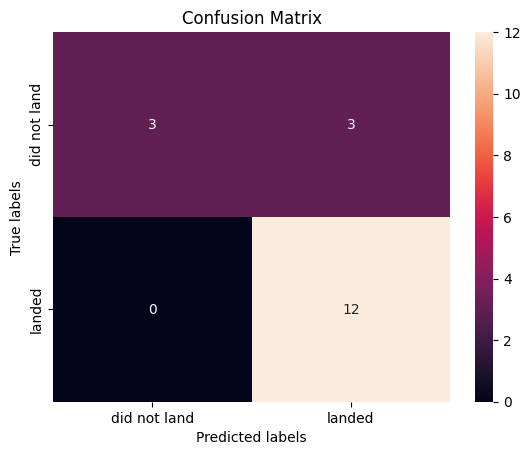


SVM Best Parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
SVM Best CV Accuracy: 0.8482142857142856
SVM Test Accuracy: 0.8333333333333334


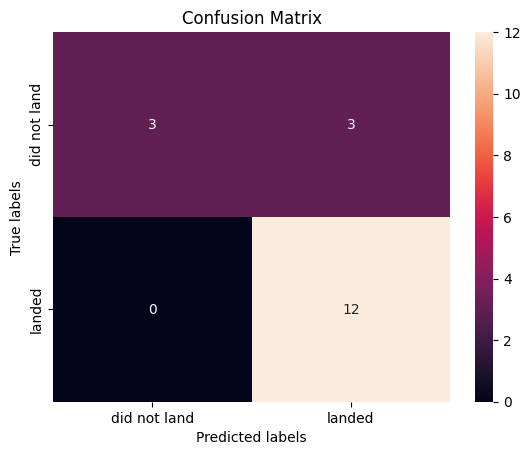


Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Best CV Accuracy: 0.8714285714285713
Decision Tree Test Accuracy: 0.7777777777777778


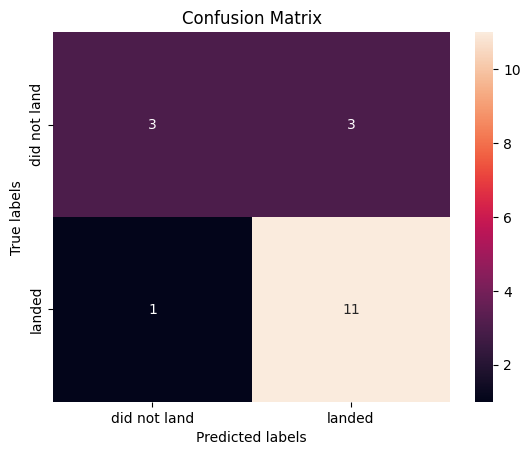


KNN Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
KNN Best CV Accuracy: 0.8482142857142858
KNN Test Accuracy: 0.8333333333333334


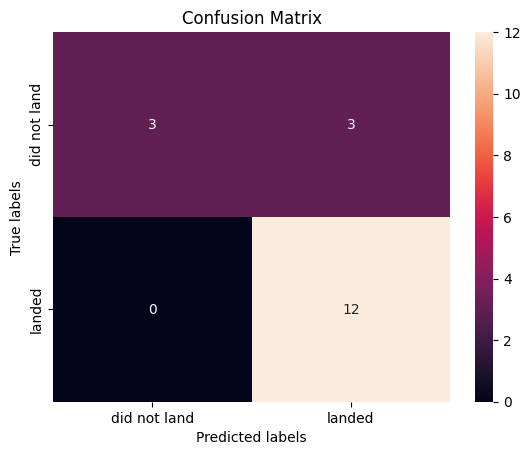


Best performing model: Logistic Regression with test accuracy: 0.8333


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Define confusion matrix plotting function
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load datasets
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# TASK 1: Create target variable Y from 'Class' column
Y = data['Class'].to_numpy()

# TASK 2: Standardize features
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# TASK 3: Split data into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# TASK 4: Logistic Regression with GridSearchCV
lr_parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, lr_parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Logistic Regression Best Parameters:", logreg_cv.best_params_)
print("Logistic Regression Best CV Accuracy:", logreg_cv.best_score_)

# TASK 5: Evaluate Logistic Regression on test set
lr_test_accuracy = logreg_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy:", lr_test_accuracy)
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)

# TASK 6: SVM with GridSearchCV
svm_parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(svm, svm_parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("\nSVM Best Parameters:", svm_cv.best_params_)
print("SVM Best CV Accuracy:", svm_cv.best_score_)

# TASK 7: Evaluate SVM on test set
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy:", svm_test_accuracy)
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)

# TASK 8: Decision Tree with GridSearchCV
tree_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree = DecisionTreeClassifier(random_state=2)
tree_cv = GridSearchCV(tree, tree_parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("\nDecision Tree Best Parameters:", tree_cv.best_params_)
print("Decision Tree Best CV Accuracy:", tree_cv.best_score_)

# TASK 9: Evaluate Decision Tree on test set
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", tree_test_accuracy)
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)

# TASK 10: KNN with GridSearchCV
knn_parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("\nKNN Best Parameters:", knn_cv.best_params_)
print("KNN Best CV Accuracy:", knn_cv.best_score_)

# TASK 11: Evaluate KNN on test set
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", knn_test_accuracy)
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

# TASK 12: Compare model performances
models = {
    'Logistic Regression': lr_test_accuracy,
    'SVM': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'KNN': knn_test_accuracy
}

best_model = max(models, key=models.get)
print(f"\nBest performing model: {best_model} with test accuracy: {models[best_model]:.4f}")

In [4]:
# Print all model accuracies for comparison
print("\nModel Test Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")


Model Test Accuracies:
Logistic Regression: 0.8333
SVM: 0.8333
Decision Tree: 0.7778
KNN: 0.8333


In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the SpaceX dataset
spacex_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv")

# Chart 1: Launch Success Count for All Sites (Pie Chart)
fig1 = px.pie(
    spacex_df,
    names='Launch Site',
    title='Launch Distribution by Site',
    hole=0.3
)
fig1.update_traces(
    textposition='inside',
    textinfo='percent+label+value',
    marker=dict(line=dict(color='#000000', width=2))
fig1.update_layout(
    title_x=0.5,
    annotations=[dict(text='Total Launches', x=0.5, y=0.5, font_size=15, showarrow=False)]
)
fig1.show()

# Chart 2: Launch Success Ratio for Best Performing Site (Pie Chart)
# Calculate success ratio per site
success_ratios = spacex_df.groupby('Launch Site')['class'].mean().reset_index()
best_site = success_ratios.loc[success_ratios['class'].idxmax(), 'Launch Site']
best_site_df = spacex_df[spacex_df['Launch Site'] == best_site]

fig2 = px.pie(
    best_site_df,
    names='class',
    title=f'Success Rate at {best_site} (Highest Success Ratio)',
    hole=0.3,
    category_orders={'class': [1, 0]},
    color='class',
    color_discrete_map={1: 'green', 0: 'red'}
)
fig2.update_traces(
    textposition='inside',
    textinfo='percent+label',
    labels={1: 'Success', 0: 'Failure'}
)
fig2.update_layout(
    title_x=0.5,
    annotations=[dict(text=f"{best_site}", x=0.5, y=0.5, font_size=15, showarrow=False)]
)
fig2.show()

# Chart 3: Payload vs. Launch Outcome with Range Slider (Scatter Plot)
fig3 = px.scatter(
    spacex_df,
    x='Payload Mass (kg)',
    y='class',
    color='Booster Version',
    title='Payload Mass vs. Launch Outcome',
    labels={'class': 'Launch Outcome', 'Payload Mass (kg)': 'Payload Mass (kg)'},
    category_orders={'class': [1, 0]},
    range_x=[0, spacex_df['Payload Mass (kg)'].max() + 1000],
    range_y=[-0.5, 1.5],
    height=500
)

# Add success/failure annotations
fig3.update_yaxes(
    tickvals=[0, 1],
    ticktext=['Failure', 'Success']
)
fig3.update_layout(
    title_x=0.5,
    xaxis=dict(rangeslider=dict(visible=True))
)

# Add horizontal success threshold line
max_payload = spacex_df['Payload Mass (kg)'].max()
fig3.add_shape(
    type="line",
    x0=0, y0=0.5, x1=max_payload, y1=0.5,
    line=dict(color="grey", dash="dash")
)

# Highlight successful payload range
success_df = spacex_df[spacex_df['class'] == 1]
min_success = success_df['Payload Mass (kg)'].min()
max_success = success_df['Payload Mass (kg)'].max()

fig3.add_shape(
    type="rect",
    x0=min_success, y0=0.5, x1=max_success, y1=1.5,
    fillcolor="lightgreen",
    opacity=0.2,
    line_width=0
)

fig3.add_annotation(
    x=(min_success + max_success)/2,
    y=1.2,
    text=f"Highest Success Rate: {min_success}-{max_success} kg",
    showarrow=False,
    font=dict(size=12)
)

fig3.show()

SyntaxError: '(' was never closed (3601685621.py, line 16)